In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
salary_df = pd.read_csv('/Users/rahman/Downloads/salaries_vs_grade.csv')
salary_df.head(10)

,S.no,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [5]:
salary_df.describe()

,S.no,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [6]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S.no                    50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [7]:
import statsmodels.api as sm
X = sm.add_constant(salary_df['Percentage in Grade 10'])
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [10]:
Y = salary_df['Salary']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=100)

In [13]:
salary_df_lm = sm.OLS(y_train,X_train).fit()

In [15]:
print(salary_df_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [16]:
salary_df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2023-07-13 11:52      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

<Figure size 800x600 with 0 Axes>

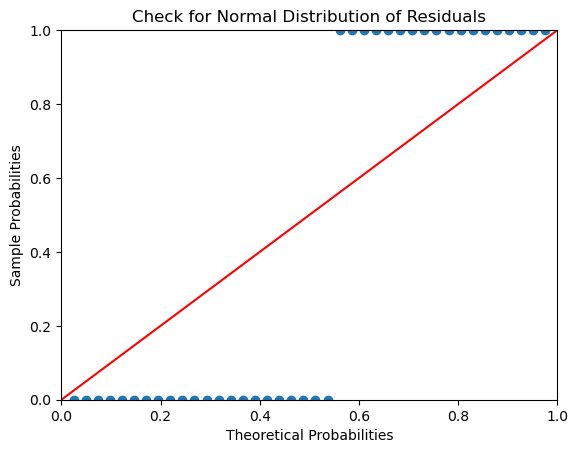

In [24]:
residuals_inSalary = salary_df_lm.resid
probplot = sm.ProbPlot(residuals_inSalary)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Check for Normal Distribution of Residuals")
plt.show()

In [25]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

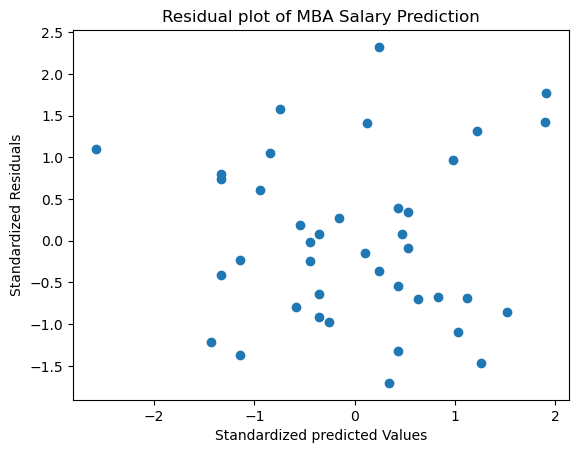

In [26]:
plt.scatter(get_standardized_values(salary_df_lm.fittedvalues),get_standardized_values(residuals_inSalary))
plt.title("Residual plot of MBA Salary Prediction");
plt.xlabel("Standardized predicted Values")
plt.ylabel("Standardized Residuals");

In [27]:
from scipy.stats import zscore

In [28]:
salary_df['Z_score_salary'] = zscore(salary_df.Salary)

In [29]:
salary_df[(salary_df.Z_score_salary>3.0)|(salary_df<-3.0)]

,S.no,Percentage in Grade 10,Salary,Z_score_salary
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [30]:
pred_y = salary_df_lm.predict(X_test)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error

In [32]:
np.abs(r2_score(y_test,pred_y))

0.156645849742304

In [33]:
np.sqrt(mean_squared_error(y_test,pred_y))

73458.04348346895

In [37]:
result_df = pd.DataFrame({'Actual': y_test,'Prediction': pred_y})
print(result_df)

    Actual     Prediction
6   260000  279828.402452
36  177600  272707.227686
37  236000  215737.829560
28  360000  237101.353858
43  250000  295851.045675
49  300000  247070.998530
5   300000  226419.591709
33  330000  308313.101515
20  120000  254904.290772
42  300000  295494.986937


In [43]:
import pickle
with open('SLR_model.pkl','wb') as file:
    pickle.dump(salary_df_lm,file)